<a href="https://colab.research.google.com/github/ravgupta11/Machine-Learning-Deep-Learning-Matrix/blob/main/ALS_Gradient_Descent_and_Vanilla_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ALS 
import numpy as np
from numpy.random import randn
from numpy.random import choice
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
i = int(input('Enter the seed: '))
np.random.seed(i)

Enter the seed: 3435


In [ ]:
def train_test_split(data, r = 0.01):
  test_data = np.zeros(data.shape)
  train_data = data.copy()
  num_items = int(r * data.shape[1])
  for user in range(data.shape[0]):
    test_indices = choice(data[user, :].nonzero()[0], size = num_items, replace = False)
    train_data[user, test_indices] = 0.
    test_data[user, test_indices] = data[user, test_indices]
  return train_data, test_data


In [ ]:
def rmse(R, X, Y, lmda_x, lmda_y):
  Error = (X.T @ Y)
  Error = R - Error
  Error = Error * Error
  return (np.sum(Error, axis = None) * 1 / (Error.shape[0] * Error.shape[1])) ** 0.5

def loss(R, X, Y, lmda_x, lmda_y):
  return Reg + rmse(R, X, lmda_x, lmda_y)

def update_x(R, X, Y, lmda): ##Least Squares
  X = Y @ R.T
  inverse = np.linalg.inv(Y @ Y.T + lmda * np.identity(Y.shape[0]))
  return (inverse @ X)

def update_y(R, X, Y, lmda):## Least squares
  Y = X @ R
  inverse = np.linalg.inv(X @ X.T  + lmda * np.identity(X.shape[0]))
  return (inverse @ Y)

def update_x_gd(R, X, Y, lmda, alpha = 1e-5):#Gradient Descent
  b = X.T @ Y
  b = R - b
  b = b @ Y.T 
  X = X - alpha * (-2* b + 2 * lmda * X.T).T
  return X

def update_y_gd(R, X, Y, lmda, alpha =1e-5):##Gradient descent 
  b = Y.T @ X
  b = R.T - b
  b = b @ X.T
  Y = Y - alpha * (-2 * b + 2 * lmda * Y.T).T
  return Y

def iterate(R, X, Y, lmda_x, lmda_y, epochs):
  for _ in range(epochs):
    X = update_x_gd(R, X, Y, lmda_x)
    Y = update_y_gd(R, X, Y, lmda_y)
  return X, Y

def train(users, items, R, lmda_x, lmda_y, epochs, k):
  X , Y = randn(k, users), randn(k, items)
  X, Y  = iterate(R, X, Y, lmda_x, lmda_y, epochs)
  return X, Y



In [ ]:
def grid_search(epochs, embds, lmdas_x, lmdas_y, train_data, test_data):
    for lmda_x in lmdas_x:
      for lmda_y in lmdas_y:
        for embd in embds:  
          plt.figure(figsize = (10,10))
          flag = False
          loss_train , loss_test, total = 0., 0., 0
          loss_train_list, loss_test_list,total_epochs = [], [], []
          for epoch in epochs:
            if flag == False:
              X, Y = train(train_data.shape[0], train_data.shape[1], train_data, lmda_x, lmda_y, epoch, embd)
              flag = True
            else:
              X, Y = iterate(train_data, X, Y, lmda_x, lmda_y, epoch)
            total += epoch
            loss_train = rmse(train_data, X, Y, lmda_x, lmda_y)
            loss_test = rmse(test_data, X, Y, lmda_x, lmda_y)
            loss_train_list.append(loss_train)
            loss_test_list.append(loss_test)
            total_epochs.append(total)
          plt.plot(total_epochs, loss_train_list, label = "Training", linewidth = 10)
          print(total_epochs)
          plt.plot(total_epochs, loss_test_list, label = "Test", linewidth = 10)
          plt.xticks(fontsize = 10)
          plt.title(str(embd)+ ', ' +str(lmda_x)  + ', ' + str(lmda_y) + ', ' + str(loss_test_list[-1] ** 0.5))
          plt.yticks(fontsize = 10)
          plt.xlabel('iterations', fontsize=30);
          plt.ylabel('MSE', fontsize=30);
          plt.legend(loc='best', fontsize=20);
          

In [ ]:
!curl -O http://files.grouplens.org/datasets/movielens/ml-100k.zip
!unzip ml-100k.zip
!cd ml-100k/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4808k  100 4808k    0     0  9503k      0 --:--:-- --:--:-- --:--:-- 9484k
Archive:  ml-100k.zip
replace ml-100k/allbut.pl? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
ynames = ['user_id', 'item_id', 'rating', 'timestamp']
train_df = pd.read_csv('u.data', sep='\t', names=names)
test_df = pd.read_csv('u1.test', sep ='\t', names = names)
for row in test_df.itertuples():
  if(row.user_id not in train_df.user_id or row.item_id not in train_df.item_id):
    test_df.drop(row.Index, inplace = True)
print(len(test_df))

20000


In [ ]:
def pandas_to_numpy(df, rows, cols):
  ratings = np.zeros((rows, cols))
  for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
  return ratings
train_data = pandas_to_numpy(train_df, train_df.user_id.unique().max(), train_df.item_id.unique().max())
test_data = pandas_to_numpy(test_df, train_df.user_id.unique().max(), train_df.item_id.unique().max())

In [ ]:
def sparsity_check(data):
  print (str(train_df.user_id.unique().max()) + ' users')
  print (str(train_df.item_id.unique().max()) + ' items')
  sparsity = float(len(data.nonzero()[0]))
  sparsity /= (train_data.shape[0] * train_data.shape[1])
  sparsity *= 100
  print ('Sparsity: {:4.2f}%'.format(sparsity))
sparsity_check(train_data)
sparsity_check(test_data)

943 users
1682 items
Sparsity: 6.30%
943 users
1682 items
Sparsity: 1.26%


In [ ]:
#train_data, test_data = train_test_split(ratings)
train_data, test_data

(array([[5., 3., 4., ..., 0., 0., 0.],
        [4., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [5., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 5., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

[5, 10, 15, 20]


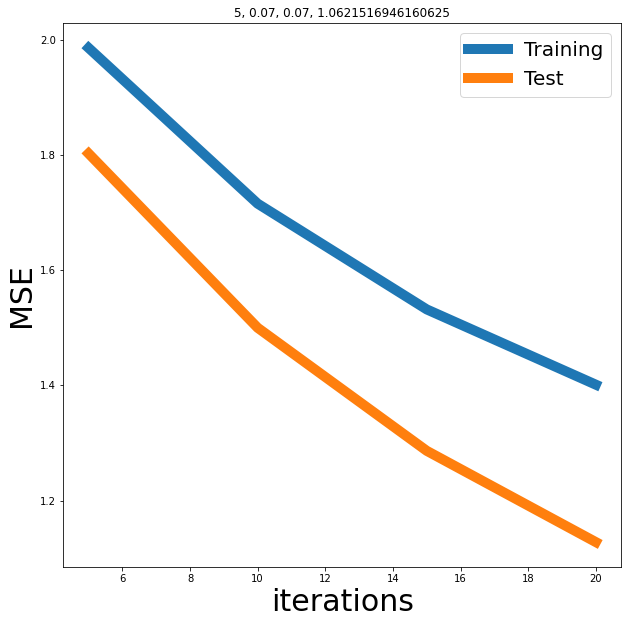

In [ ]:
embds = [5]
lmdas = [0.07]
epochs = [5, 5, 5, 5,]
grid_search(epochs, embds, lmdas, lmdas, train_data, test_data) #A approx= U V.T in normal 10 approx= 1.8 * 5